In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Support Vector Machine/homework.csv')
df.head()

,X,y
0,0.002756,0.733312
1,0.006167,0.006167
2,0.070651,0.070592
3,0.299684,0.295218
4,0.603322,0.567381


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       40 non-null     float64
 1   y       40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [6]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

X = df[['X']]
y = df[['y']]

# create an SVR and linear regression model
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel = 'poly')
svr_rbf = SVR(kernel = 'rbf')
linreg = LinearRegression()

# HOMEWORK:

We will now explore SVM for Regression.

Your instruction:
1. Open `homework.csv`
2. The X will be predictor variable, and y will be dependent/target variable
3. You will train 4 models as provided in the code above
4. Evaluate the performance (regression prediction) of each of the 4 models.


Answer the following question:

### Q1: What is the best model for this dataset? Why?

### Q2: What is the advantage and disadvantages of SVR over Linear Regression? Explain briefly in your own words!

In [7]:
def plot_result(X, y, y_pred, labels):

    colors = ['navy', 'c', 'cornflowerblue', 'red']
    lw = 2
    plt.scatter(X, y, color='darkorange', label='data')
    for i in range(len(y_pred)):
        plt.plot(X, y_pred[i], color = colors[i], lw=2, label = labels[i])
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

In [8]:
y = y.values.ravel()

svr_linear.fit(X, y)
svr_poly.fit(X, y)
svr_rbf.fit(X, y)
linreg.fit(X, y)

LinearRegression()

In [9]:
y_linear = svr_linear.predict(X)
y_poly = svr_poly.predict(X)
y_rbf = svr_rbf.predict(X)

y_linreg = linreg.predict(X)

In [10]:
y_pred = [y_linear, y_poly, y_rbf, y_linreg]

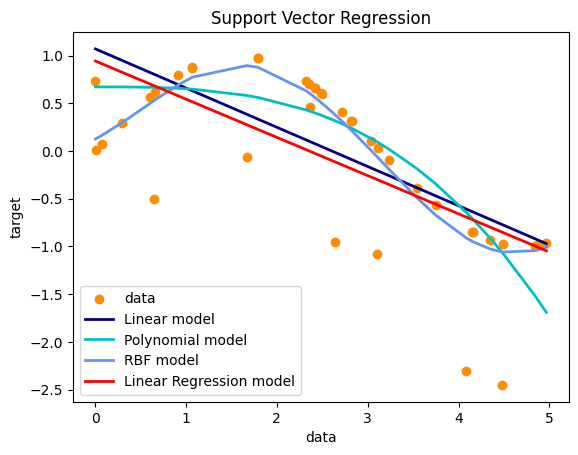

In [11]:
models = ['Linear model', 'Polynomial model', 'RBF model', 'Linear Regression model']

plot_result(X, y, y_pred, models)

In [12]:
# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

accuracy_list= []
for i in range(len(y_pred)):
    r2 = r2_score(y, y_pred[i])
    rmse = np.sqrt(mean_squared_error(y, y_pred[i]))
    mae = mean_absolute_error(y, y_pred[i])
    mape = mean_absolute_percentage_error(y, y_pred[i])

    accuracy = {'Model' : models[i],
                'R-squared' : r2,
                'RMSE' : rmse,
                'MAE' : mae,
                'MAPE' : mape}

    accuracy_list.append(accuracy)

df_accuracy = pd.DataFrame(accuracy_list)
df_accuracy

,Model,R-squared,RMSE,MAE,MAPE
0,Linear model,0.453490,0.633147,0.484381,5.675917
1,Polynomial model,0.568436,0.562636,0.386921,3.630132
2,RBF model,0.681155,0.483610,0.269026,1.267114
3,Linear Regression model,0.467421,0.625024,0.486467,5.215028


# JAWABAN


### Q1: Jawaban Anda:

 What is the best model for this dataset? Why?

From the plots and evaluations of the models, we can see that the RBF model stands out with the highest R-squared value and the lowest RMSE, MAE, and MAPE values.

1. **High R-squared Value:** The R-squared value for the RBF model is 0.681155, which is higher than the other models. This means that the RBF model can explain about 68% of the variation or changes in our data, which is more than what the other models can explain. In simpler terms, the RBF model does a better job at understanding and representing the patterns in our data.

2. **Low RMSE:** RMSE measures the average error in the predictions made by a model. A lower RMSE value means that the model's predictions are closer to the actual values. The RBF model has the lowest RMSE at 0.483610, indicating that its predictions tend to be more accurate.

3. **Low MAE:** MAE calculates the average of the absolute errors in the predictions made by the model. Again, a lower MAE value (0.269026) for the RBF model indicates that this model is more precise in predicting exact values with fewer errors.

4. **Low MAPE:** MAPE represents the average percentage of absolute errors. The RBF model has the lowest MAPE value at 1.267114%, meaning its percentage errors in predictions are very small compared to other models.

Overall, the RBF model is the best among the evaluated models because it shows superior performance by providing the most accurate predictions that are closest to reality, and it has relatively smaller errors in making these predictions.

### Q2: Jawaban Anda:

What is the advantage and disadvantages of SVR over Linear Regression? Explain briefly in your own words!

Linear regression is a method that helps predict the value of one thing based on another related thing, using a straight line to describe that relationship. Support Vector Regression (SVR) is more complex than linear regression because it can adapt not only to linear situations but also to non-linear ones using something called the "kernel trick." With this trick, SVR can find more complex relationships, like curves or other shapes, which might not be captured by linear regression.

From the evaluation results of the four models, we can see that the R-square, RMSE, MAE, and MAPE values for the Polynomial and RBF models are higher than those for Linear Regression, indicating that the SVM models better fit non-linear data.

Linear Regression is a good choice if we are confident that the relationship among the variables in our data is linear and there are no significant outliers. SVR, on the other hand, is a better choice when dealing with complex data, containing outliers, or non-linear relationships between variables, as with our data.

Here are some advantages and disadvantages of SVR compared to Linear Regression:

- **Handling Non-linearity:** SVR can better handle complex and non-linear relationships between variables compared to Linear Regression. This is evident from the higher R-squared value in the RBF model, indicating that it can better explain the variation in the data. In this dataset, the non-linear relationships between features are likely effectively handled by the SVR with an RBF kernel.

- **Robustness to Outliers:** The RBF and Polynomial SVR models show lower RMSE and MAE values than Linear Regression, which could indicate that these models are more robust against outliers compared to the linear model. This aligns with the nature of SVR, which uses an error margin to focus on improving predictions around support vectors and is less affected by noise or outlier data.

- **Parameter Selection and Computational Complexity:** Although the data does not provide information on training times or setup difficulty, it's important to note that using SVR with an RBF kernel might require more careful parameter tuning (such as C and gamma) and more computational time compared to Linear Regression.

- **Model Interpretability:** Linear Regression is easier to interpret; the coefficients of the model provide a direct understanding of the relationship between features and the target. On the other hand, the RBF model may offer little direct insight into how individual features affect the prediction outcomes, due to the complexity and the workings of the kernel used.